In [1]:
import pandas as pd, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.pipeline import Pipeline  
from sklearn.metrics import classification_report , confusion_matrix

In [2]:
data = pd.read_csv("Pass-Fail Data.csv")

In [3]:
data.head()

,student_id,attendance_pct,homework_pct,midterm_score,study_hours_per_week,pass
0,1,95,92,88,12,1
1,2,88,85,79,10,1
2,3,60,55,58,4,0
3,4,72,70,65,6,1
4,5,40,45,50,3,0


In [4]:
X = data.drop(columns = "pass")
y = data["pass"]

In [5]:
X_train , X_test , y_train , y_test = train_test_split(
    X , y , test_size = 0.25 , random_state = 42 , stratify = y
)

In [6]:
y.value_counts()

pass
1    60
0    40
Name: count, dtype: int64

In [7]:
model = Pipeline([
    ("scale" , StandardScaler()),
    ("log", LogisticRegression())
]
)

In [8]:
model.fit(X_train,y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scale', ...), ('log', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work 

In [9]:
model.predict(X_test)

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1])

In [10]:
model.predict_proba(X_test)

array([[4.73471176e-03, 9.95265288e-01],
       [8.92291228e-03, 9.91077088e-01],
       [3.85126690e-01, 6.14873310e-01],
       [9.98959062e-01, 1.04093771e-03],
       [2.45830875e-05, 9.99975417e-01],
       [1.84297929e-04, 9.99815702e-01],
       [9.92854753e-01, 7.14524696e-03],
       [2.06794631e-03, 9.97932054e-01],
       [9.78084286e-02, 9.02191571e-01],
       [1.38353819e-01, 8.61646181e-01],
       [5.92080693e-03, 9.94079193e-01],
       [3.49104363e-03, 9.96508956e-01],
       [5.33903092e-01, 4.66096908e-01],
       [9.00097143e-01, 9.99028566e-02],
       [1.45775882e-04, 9.99854224e-01],
       [9.70375695e-01, 2.96243052e-02],
       [9.88296869e-01, 1.17031308e-02],
       [4.73423765e-01, 5.26576235e-01],
       [8.74125676e-01, 1.25874324e-01],
       [9.99175253e-01, 8.24746528e-04],
       [9.36358113e-01, 6.36418867e-02],
       [9.94870308e-01, 5.12969240e-03],
       [9.86455164e-01, 1.35448357e-02],
       [1.45768770e-03, 9.98542312e-01],
       [6.778498

In [11]:
pred = model.predict(X_test)

In [12]:
print(classification_report(y_test, pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.93      0.97        15

    accuracy                           0.96        25
   macro avg       0.95      0.97      0.96        25
weighted avg       0.96      0.96      0.96        25

[[10  0]
 [ 1 14]]


In [13]:

y = np.select(
    [
        data["midterm_score"] < 60,
        (data["midterm_score"] >= 60) & (data["midterm_score"] < 80),
        data["midterm_score"] >= 80
    ],
    [0, 1, 2]
)

X = data.drop(columns=["student_id", "pass"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

model = Pipeline([
    ("scale", StandardScaler()),
    ("log", LogisticRegression(max_iter=2000))
])

model.fit(X_train, y_train)

pred = model.predict(X_test)

print("Confusion matrix (rows=true, cols=pred):")
print(confusion_matrix(y_test, pred))

print("\nClassification report:")
print(classification_report(y_test, pred, target_names=["fail(0)", "medium(1)", "excellent(2)"]))

proba = model.predict_proba(X_test)
print("\nFirst 10 proba rows [P(fail), P(medium), P(excellent)]:")
print(proba[:25])

Confusion matrix (rows=true, cols=pred):
[[9 0 0]
 [1 7 0]
 [0 0 8]]

Classification report:
              precision    recall  f1-score   support

     fail(0)       0.90      1.00      0.95         9
   medium(1)       1.00      0.88      0.93         8
excellent(2)       1.00      1.00      1.00         8

    accuracy                           0.96        25
   macro avg       0.97      0.96      0.96        25
weighted avg       0.96      0.96      0.96        25


First 10 proba rows [P(fail), P(medium), P(excellent)]:
[[1.30184758e-03 5.60460503e-01 4.38237649e-01]
 [6.75766146e-03 8.05028276e-01 1.88214062e-01]
 [1.16680940e-06 1.36664247e-02 9.86332408e-01]
 [9.90109384e-01 9.88983934e-03 7.76842754e-07]
 [1.81383804e-03 6.09024462e-01 3.89161700e-01]
 [4.16634895e-04 3.53430511e-01 6.46152855e-01]
 [9.65533491e-01 3.44597327e-02 6.77591108e-06]
 [5.19966063e-02 9.16459260e-01 3.15441336e-02]
 [1.91813106e-04 2.67500107e-01 7.32308080e-01]
 [2.83931154e-04 3.08823320e-01 6.908

<Axes: >

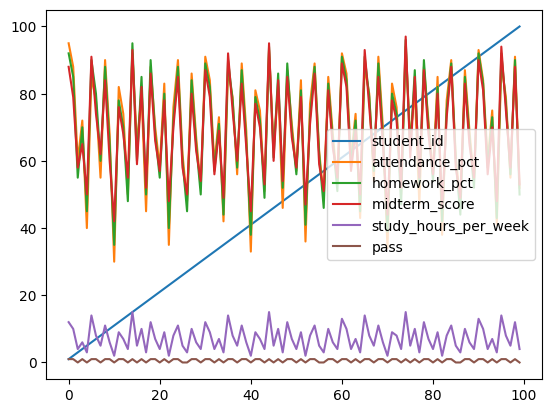

In [14]:
data.plot()

ValueError: Must specify a fill 'value' or 'method'.